# 1. Download Libraries

In [52]:
!pip install -U scikit-fuzzy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# 2. Import Libraries

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# 3. Define Universe and Membership Function

In [54]:
# Universe from 0 to 10 with step of 0.1
x = np.arange(0, 10.05, 0.1)

# Trapezoidal membership function
mfx = fuzz.trapmf(x, [1, 3, 6, 9])

# 4. Fuzzy Membership Function

In [55]:
# Defuzzify this membership function five ways
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')   # Center of gravity
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')   # Bisector
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')             # Mean of maximum
defuzz_som = fuzz.defuzz(x, mfx, 'som')             # Smallest of maximum
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')             # Largest of maximum

print("Centroid:", defuzz_centroid)
print("Bisector:", defuzz_bisector)
print("MOM:", defuzz_mom)
print("SOM:", defuzz_som)
print("LOM:", defuzz_lom)

# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum', 'max of maximum']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

Centroid: 4.787878787878787
Bisector: 4.75
MOM: 4.5
SOM: 3.0
LOM: 6.0


# 5. Plot Membership Function with Defuzzified Values

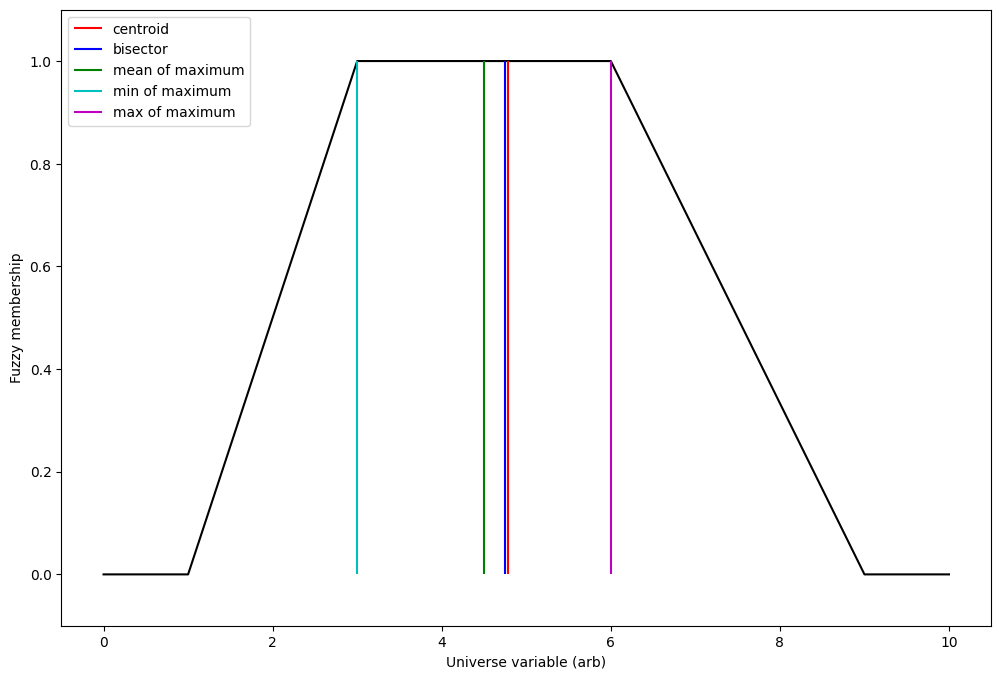

In [56]:
plt.figure(figsize=(12, 8))

plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()